# Recommenders Assignments

## 1. Content-Based Filtering: Cosine Similarity

In [1]:
# 1. Read in the data from the first tab of the Movie Ratings spreadsheet, which contains genre labels
import pandas as pd

movies = pd.read_excel('../Data/Movie_Ratings.xlsx')
movies.head()

,Movie_ID,Movie_Title,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0


In [2]:
# 2. Remove the non-genre columns of the movie genre data
#movies.iloc[:,2:]
genres = movies.drop(columns=['Movie_ID']).set_index('Movie_Title')
genres.head()

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
Movie_Title,,,,,,,,,,,,,,,,,,
Toy Story (1995),0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
GoldenEye (1995),1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
Four Rooms (1995),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
Get Shorty (1995),1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
Copycat (1995),0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0


In [3]:
# 3. Calculate the cosine similarity of Toy Story (1995) and Get Shorty (1995)
from sklearn.metrics.pairwise import cosine_similarity

cosine_similarity(genres.loc[['Toy Story (1995)', 'Get Shorty (1995)']])

array([[1.        , 0.33333333],
       [0.33333333, 1.        ]])

In [4]:
# 4. Calculate the cosine similarity of Toy Story (1995) compared with all the movies
cosine_similarity(genres)

array([[1.        , 0.        , 0.        , ..., 0.        , 0.57735027,
        0.        ],
       [0.        , 1.        , 0.57735027, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.57735027, 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.70710678],
       [0.57735027, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.70710678, 0.        ,
        1.        ]])

In [5]:
cosine_df = pd.DataFrame(cosine_similarity(genres), index=movies['Movie_Title'], columns=movies['Movie_Title']).reset_index()
cosine_df.head()

Movie_Title,Movie_Title,Toy Story (1995),GoldenEye (1995),Four Rooms (1995),Get Shorty (1995),Copycat (1995),Shanghai Triad (Yao a yao yao dao waipo qiao) (1995),Twelve Monkeys (1995),Babe (1995),Dead Man Walking (1995),...,Mirage (1995),Mamma Roma (1962),"Sunchaser, The (1996)","War at Home, The (1996)",Sweet Nothing (1995),Mat' i syn (1997),B. Monkey (1998),Sliding Doors (1998),You So Crazy (1994),Scream of Stone (Schrei aus Stein) (1991)
0,Toy Story (1995),1.000000,0.000000,0.00000,0.333333,0.000000,0.00000,0.000000,0.666667,0.00000,...,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000,0.000000,0.57735,0.00000
1,GoldenEye (1995),0.000000,1.000000,0.57735,0.333333,0.333333,0.00000,0.000000,0.000000,0.00000,...,0.816497,0.00000,0.00000,0.00000,0.00000,0.00000,0.408248,0.000000,0.00000,0.00000
2,Four Rooms (1995),0.000000,0.577350,1.00000,0.000000,0.577350,0.00000,0.000000,0.000000,0.00000,...,0.707107,0.00000,0.00000,0.00000,0.00000,0.00000,0.707107,0.000000,0.00000,0.00000
3,Get Shorty (1995),0.333333,0.333333,0.00000,1.000000,0.333333,0.57735,0.408248,0.666667,0.57735,...,0.408248,0.57735,0.57735,0.57735,0.57735,0.57735,0.000000,0.408248,0.57735,0.57735
4,Copycat (1995),0.000000,0.333333,0.57735,0.333333,1.000000,0.57735,0.408248,0.333333,0.57735,...,0.408248,0.57735,0.57735,0.57735,0.57735,0.57735,0.408248,0.408248,0.00000,0.57735


In [6]:
cosine_df[['Movie_Title', 'Toy Story (1995)']]

Movie_Title,Movie_Title,Toy Story (1995)
0,Toy Story (1995),1.000000
1,GoldenEye (1995),0.000000
2,Four Rooms (1995),0.000000
3,Get Shorty (1995),0.333333
4,Copycat (1995),0.000000
...,...,...
1677,Mat' i syn (1997),0.000000
1678,B. Monkey (1998),0.000000
1679,Sliding Doors (1998),0.000000
1680,You So Crazy (1994),0.577350


In [7]:
# 5. Return the top 5 movies with the highest cosine similarity
cosine_df[['Movie_Title', 'Toy Story (1995)']].sort_values(by='Toy Story (1995)', ascending=False).head(6)

Movie_Title,Movie_Title,Toy Story (1995)
0,Toy Story (1995),1.000000
421,Aladdin and the King of Thieves (1996),1.000000
94,Aladdin (1992),0.866025
1218,"Goofy Movie, A (1995)",0.866025
242,Jungle2Jungle (1997),0.816497
622,Angels in the Outfield (1994),0.816497


## 2. User-Item Matrix

In [8]:
# 1. Read in the movies, users and ratings tabs of the spreadsheet into three DataFrames
users = pd.read_excel('../Data/Movie_Ratings.xlsx', sheet_name=1)
users.head()

,User_ID,Age,Gender,Occupation
0,1,24,M,technician
1,2,53,F,other
2,3,23,M,writer
3,4,24,M,technician
4,5,33,F,other


In [9]:
ratings = pd.read_excel('../Data/Movie_Ratings.xlsx', sheet_name=2)
ratings.head()

,User_ID,Movie_ID,Rating
0,196,242,3
1,186,302,3
2,22,377,1
3,244,51,2
4,166,346,1


In [10]:
ratings.describe() # useful to decide what to fill any NaN value

,User_ID,Movie_ID,Rating
count,100000.00000,100000.000000,100000.000000
mean,462.48475,425.530130,3.529860
std,266.61442,330.798356,1.125674
min,1.00000,1.000000,1.000000
25%,254.00000,175.000000,3.000000
50%,447.00000,322.000000,4.000000
75%,682.00000,631.000000,4.000000
max,943.00000,1682.000000,5.000000


In [11]:
# 2. Use .pivot to restructure the ratings data into a user-item matrix
X = ratings.pivot(index='User_ID', columns='Movie_ID', values='Rating').fillna(3)
X.head()

Movie_ID,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
User_ID,,,,,,,,,,,,,,,,,,,,,
1,5.0,3.0,4.0,3.0,3.0,5.0,4.0,1.0,5.0,3.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
2,4.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
3,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
4,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
5,4.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0


## 3. TruncatedSVD

In [12]:
# 1. Apply TruncatedSVD to the user-item matrix from the last assignment
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=2)
svd.fit(X)

TruncatedSVD()

In [13]:
# 2. View the user-item matrix and the shape of the user-item matrix
X.head()

Movie_ID,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
User_ID,,,,,,,,,,,,,,,,,,,,,
1,5.0,3.0,4.0,3.0,3.0,5.0,4.0,1.0,5.0,3.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
2,4.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
3,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
4,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
5,4.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0


In [14]:
X.shape

(943, 1682)

In [15]:
# 3. View the U matrix and the shape of the U matrix
U = svd.transform(X)
U_df = pd.DataFrame(U)
U_df.head()

,0,1
0,127.325618,7.172993
1,124.145754,-2.173875
2,122.727835,-2.533024
3,123.802128,-2.822301
4,122.566026,0.754478


In [16]:
U.shape # users x latent features

(943, 2)

In [17]:
# 4. View the VT matrix and the shape of the VT matrix
VT = svd.components_
VT_df = pd.DataFrame(VT)
VT_df

,0,1,2,3,4,5,6,7,8,9,...,1672,1673,1674,1675,1676,1677,1678,1679,1680,1681
0,0.027515,0.024345,0.024133,0.025100,0.024327,0.024231,0.026796,0.025988,0.026408,0.024741,...,0.024100,0.024109,0.024100,0.024091,0.024100,0.024083,0.024100,0.024091,0.024100,0.024100
1,0.068073,0.008370,-0.007015,0.051881,-0.004403,-0.009123,0.061829,0.073484,0.052806,0.007769,...,-0.010383,-0.009653,-0.010383,-0.010600,-0.010383,-0.009784,-0.010383,-0.010083,-0.010383,-0.010383


In [18]:
VT_df.shape # latent features x movies

(2, 1682)

## 4. Choosing the Number of Components

In [19]:
# 1. Fit a TruncatedSVD model with 500 components
svd500 = TruncatedSVD(n_components=500)
svd500.fit(X)

TruncatedSVD(n_components=500)

In [20]:
U500 = svd500.transform(X)
pd.DataFrame(U500)

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,127.325618,7.173031,-0.907461,5.231709,-2.167019,-1.874486,4.432229,2.894944,-2.266183,0.029382,...,0.074226,-0.152113,0.079596,0.097992,0.054578,-0.207594,0.108324,-0.134676,-0.008481,-0.038067
1,124.145754,-2.173872,-0.531446,0.834728,2.276656,-0.611334,0.515801,2.473437,-1.182575,-0.290647,...,0.044254,0.183386,-0.145163,0.349804,-0.232916,0.098070,-0.157739,-0.190010,-0.056890,-0.313294
2,122.727835,-2.533028,-0.567466,-0.600540,-0.735368,0.202150,0.220568,-1.349227,-0.322606,-0.567155,...,-0.292839,0.150068,-0.381435,0.127740,0.137025,0.263434,0.076613,0.165615,-0.034347,-0.403702
3,123.802128,-2.822308,0.533045,0.232890,-0.125395,0.595281,0.011407,0.062385,0.514061,0.398184,...,0.088018,0.078884,-0.361826,-0.049788,0.077441,-0.306253,-0.282703,-0.144101,0.177670,0.018146
4,122.566026,0.754483,-0.591899,1.772757,-4.253326,1.408859,3.002253,2.684717,-0.209389,1.068306,...,0.016304,-0.078698,-0.011712,-0.037026,0.152346,-0.054434,0.086677,0.013362,0.043242,0.085656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
938,124.551607,-2.591700,1.892229,0.216106,1.403485,-0.812941,-0.819922,2.263281,1.267616,-1.846754,...,-0.109841,0.088443,0.263890,0.095173,0.021669,0.136051,-0.064309,0.025523,0.111354,0.116395
939,124.295574,0.039667,0.322963,0.499173,0.087867,-0.160903,-0.132286,0.415009,0.170102,1.807377,...,-0.200360,0.319570,-0.093035,0.204654,0.255313,0.152088,-0.080913,0.126457,-0.022838,0.069182
940,123.591935,-2.361526,0.629931,0.646140,-0.127538,0.178851,0.843847,0.894579,0.584616,-0.683615,...,0.024205,-0.169401,0.043759,0.073536,-0.251493,0.120233,0.128318,0.102880,0.119562,0.240181
941,125.558040,1.714066,0.784657,-3.327618,0.484158,0.877255,-1.043917,0.383243,-0.829650,0.285739,...,0.066526,-0.118286,-0.369133,0.079001,0.188572,-0.513539,0.015390,0.092935,-0.096525,-0.035928


In [21]:
X.shape

(943, 1682)

In [22]:
U500.shape

(943, 500)

In [23]:
# 2. Plot the cumulative explained variance ratios
import numpy as np

np.cumsum(svd500.explained_variance_ratio_).round(2)

# prep the data for line plot
cum_evr500 = list(zip(range(1, U500.shape[1] + 1), np.cumsum(svd500.explained_variance_ratio_)))
cum_evr500

[(1, 0.026342243723369924),
 (2, 0.09670746059197259),
 (3, 0.13352313267970845),
 (4, 0.15416135834298828),
 (5, 0.17065872214204356),
 (6, 0.18475289185595323),
 (7, 0.19777923632260566),
 (8, 0.20900163758765214),
 (9, 0.21951128949317464),
 (10, 0.22883464805499806),
 (11, 0.2377529339990986),
 (12, 0.24629115603507057),
 (13, 0.25438713039454797),
 (14, 0.2620810121696767),
 (15, 0.2693878605688272),
 (16, 0.2763499247194599),
 (17, 0.2830947136284885),
 (18, 0.28954257280168627),
 (19, 0.29586494233301425),
 (20, 0.30198666437571325),
 (21, 0.3080200530653636),
 (22, 0.3139973586073413),
 (23, 0.31977398609707275),
 (24, 0.3254239327157063),
 (25, 0.3309591350479502),
 (26, 0.33638743816101874),
 (27, 0.34165985447190494),
 (28, 0.3468778426769651),
 (29, 0.3520563493113172),
 (30, 0.35710688346069724),
 (31, 0.36208493152279597),
 (32, 0.3669534929876065),
 (33, 0.3717945229868261),
 (34, 0.3765442619193437),
 (35, 0.3812582748940559),
 (36, 0.38591203271865293),
 (37, 0.3904472

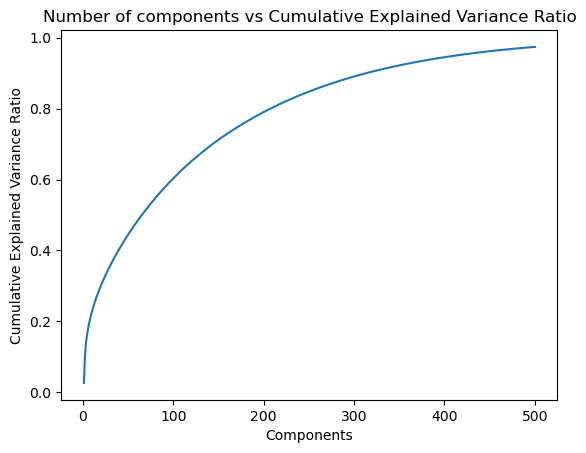

In [24]:
# 80%+ of the variance is captured at 2 components --> choose a 2 component model
cum_evr500_df = pd.DataFrame(cum_evr500).set_index(0)
cum_evr500_df.plot(
    title= 'Number of components vs Cumulative Explained Variance Ratio',
    xlabel= 'Components',
    ylabel= 'Cumulative Explained Variance Ratio',
    legend= False
);

In [25]:
# 3. Suggest a “good” number of components that best captures the info in the data set
# 250 components captures ~84% of the variance.

In [26]:
# 4. Fit another TruncatedSVD model with the “good” number of components
# 1. Fit a TruncatedSVD model with 500 components
svd250 = TruncatedSVD(n_components=250)
svd250.fit(X)

TruncatedSVD(n_components=250)

In [27]:
U250 = svd250.transform(X)
pd.DataFrame(U250)

,0,1,2,3,4,5,6,7,8,9,...,240,241,242,243,244,245,246,247,248,249
0,127.325618,7.173031,-0.907461,5.231709,-2.167019,-1.874486,4.432230,2.894944,-2.266183,0.029381,...,0.073683,0.421705,0.000794,-0.172264,-0.056160,-0.339061,-0.097967,-0.191915,0.208904,-0.120437
1,124.145754,-2.173872,-0.531446,0.834728,2.276656,-0.611334,0.515801,2.473437,-1.182575,-0.290648,...,0.583397,-0.387100,-0.134064,0.090004,-0.189321,-0.645654,-0.240168,-0.359443,-0.236544,-0.368608
2,122.727835,-2.533028,-0.567466,-0.600540,-0.735368,0.202150,0.220568,-1.349226,-0.322607,-0.567154,...,-0.178768,0.186062,-0.038419,-0.225503,0.582482,-0.231427,-0.053072,0.158580,-0.069790,0.653755
3,123.802128,-2.822308,0.533045,0.232890,-0.125395,0.595281,0.011407,0.062386,0.514060,0.398185,...,0.275554,0.132760,-0.396191,-0.104660,0.159782,-0.354870,0.287653,-0.068345,-0.168229,0.105823
4,122.566026,0.754483,-0.591899,1.772757,-4.253326,1.408859,3.002252,2.684717,-0.209390,1.068305,...,0.085248,0.502730,-0.045270,0.176882,-0.054623,-0.666511,0.126001,0.014290,-0.061146,-0.253726
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
938,124.551607,-2.591700,1.892229,0.216106,1.403485,-0.812941,-0.819923,2.263281,1.267617,-1.846752,...,-0.066742,-0.444453,-0.203651,-0.645410,-0.390578,-0.097469,0.571375,-0.012394,-0.413475,-0.647875
939,124.295574,0.039667,0.322963,0.499173,0.087867,-0.160903,-0.132286,0.415009,0.170102,1.807380,...,-0.100831,-0.005365,0.700565,-0.343757,-0.631835,-0.662589,-0.031162,-0.278563,0.442091,0.527191
940,123.591935,-2.361526,0.629931,0.646140,-0.127538,0.178851,0.843847,0.894579,0.584616,-0.683614,...,-0.172528,0.315850,-0.092747,-0.174743,0.190641,0.364298,-0.009110,0.203111,-0.018041,-0.086782
941,125.558040,1.714066,0.784657,-3.327618,0.484158,0.877255,-1.043917,0.383243,-0.829648,0.285737,...,-0.142598,0.891966,-0.156169,0.365468,-0.009720,-0.067427,-0.199298,0.218610,-0.498567,0.083579


In [28]:
X.shape

(943, 1682)

In [29]:
U250.shape

(943, 250)

In [30]:
sum(svd250.explained_variance_ratio_)

0.8467458328577253

## 5. Making Collaborative Filtering Recommendations

In [31]:
# 1. View the new user vector
import pandas as pd
import numpy as np

# read in the movies tab of the spreadsheet
movies = pd.read_excel('../Data/Movie_Ratings.xlsx')

# read in the ratings tab
ratings = pd.read_excel('../Data/Movie_Ratings.xlsx', sheet_name=2)

# use .pivot to restructure the ratings data into a user-item matrix
X = (ratings.pivot(index='User_ID', columns='Movie_ID', values='Rating').fillna(3))

# create a vector of NaN values
vector_length = X.shape[1]
new_user = np.full(vector_length, np.NaN)

# populate with 5 ratings
ratings = [5, 3, 5, 5, 4]
positions_to_populate = [11, 14, 28, 63, 66]
new_user[positions_to_populate] = ratings

# view as a DataFrame
new_user_df = pd.DataFrame([new_user], columns=movies.Movie_Title)
new_user_df

Movie_Title,Toy Story (1995),GoldenEye (1995),Four Rooms (1995),Get Shorty (1995),Copycat (1995),Shanghai Triad (Yao a yao yao dao waipo qiao) (1995),Twelve Monkeys (1995),Babe (1995),Dead Man Walking (1995),Richard III (1995),...,Mirage (1995),Mamma Roma (1962),"Sunchaser, The (1996)","War at Home, The (1996)",Sweet Nothing (1995),Mat' i syn (1997),B. Monkey (1998),Sliding Doors (1998),You So Crazy (1994),Scream of Stone (Schrei aus Stein) (1991)
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
# view only the movies that the new user rated
new_user_df.T.dropna()

,0
Movie_Title,
"Usual Suspects, The (1995)",5.0
Mr. Holland's Opus (1995),3.0
Batman Forever (1995),5.0
"Shawshank Redemption, The (1994)",5.0
Ace Ventura: Pet Detective (1994),4.0


In [40]:
# 2. Transform the user into the latent space using .transform()
new_user_250 = svd250.transform(new_user_df.fillna(3))
new_user_250[0][:5]

C:\Users\Camilo\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but TruncatedSVD was fitted without feature names
  warnings.warn(


array([ 1.23173718e+02, -2.50283200e+00, -1.16245959e-01, -1.52219136e-01,
       -2.28008885e-01])

In [42]:
# 3. Reconstruct the user-item matrix for the user using np.dot()
new_user_pred = np.dot(new_user_250, svd250.components_) # shape for both matrices are valid for multiplication.
new_user_pred

array([[3.02320604, 3.11236659, 3.07044256, ..., 3.00660338, 3.00447947,
        3.00447947]])

In [44]:
# 4. Make 10 movie recommendations for the user
new_user_recs = pd.DataFrame(new_user_pred, columns=movies.Movie_Title)
new_user_recs

Movie_Title,Toy Story (1995),GoldenEye (1995),Four Rooms (1995),Get Shorty (1995),Copycat (1995),Shanghai Triad (Yao a yao yao dao waipo qiao) (1995),Twelve Monkeys (1995),Babe (1995),Dead Man Walking (1995),Richard III (1995),...,Mirage (1995),Mamma Roma (1962),"Sunchaser, The (1996)","War at Home, The (1996)",Sweet Nothing (1995),Mat' i syn (1997),B. Monkey (1998),Sliding Doors (1998),You So Crazy (1994),Scream of Stone (Schrei aus Stein) (1991)
0,3.023206,3.112367,3.070443,2.923094,3.051402,3.021077,3.061073,3.038282,3.038848,3.146665,...,3.004479,2.99916,3.004479,3.001597,3.004479,3.008727,3.004479,3.006603,3.004479,3.004479


In [58]:
top_recs = new_user_recs.T.sort_values(by=0, ascending=False).head(14)
top_recs.columns = ['Recs']
top_recs

,Recs
Movie_Title,
"Shawshank Redemption, The (1994)",4.547370
"Usual Suspects, The (1995)",4.420509
Batman Forever (1995),3.519439
Ace Ventura: Pet Detective (1994),3.317170
Reservoir Dogs (1992),3.210854
Speed (1994),3.189686
Clerks (1994),3.186611
Schindler's List (1993),3.173046
Grease (1978),3.164830


In [59]:
already_rated = new_user_df.T.dropna().index # movies the user rated
already_rated

Index(['Usual Suspects, The (1995)', 'Mr. Holland's Opus (1995)',
       'Batman Forever (1995)', 'Shawshank Redemption, The (1994)',
       'Ace Ventura: Pet Detective (1994)'],
      dtype='object', name='Movie_Title')

In [61]:
top_recs[~top_recs.index.isin(already_rated)] # top 10 movie recommendations, excluding movies the user rated.

,Recs
Movie_Title,
Reservoir Dogs (1992),3.210854
Speed (1994),3.189686
Clerks (1994),3.186611
Schindler's List (1993),3.173046
Grease (1978),3.164830
Tommy Boy (1995),3.159966
It's a Wonderful Life (1946),3.151789
"Great Escape, The (1963)",3.149049
Philadelphia (1993),3.146732


In [36]:
# 5. Review the movies and determine if they make sense


In [37]:
# 6. Optional: Try playing around with the number of components to see the difference in movie recommendations
